## Clear messages

In [60]:
import os
import pandas as pd
import numpy as np
import json
import hashlib
from tqdm.notebook import tqdm
import random
import difflib
from itertools import chain
from string import punctuation

In [40]:
objects = []

In [41]:
for file in os.listdir('data'):
    hits = []
    with open('data/'+ file) as json_file:
        obj = json.load(json_file)
        hits = obj['hits']['hits']
        objects.extend(list(map(lambda hit: {'timestamp': hit['_source']['@timestamp'], 'message': hit['_source']['message']}, hits)))

In [42]:
df = pd.DataFrame.from_records(objects)

In [43]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Tokenized pattern

In [44]:
df['Tokenized Pattern'] = df['message'].str.replace(r' ', '*_*').str.split('*')
df

,timestamp,message,Tokenized Pattern
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ..."
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ..."
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ..."
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ..."
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC..."
...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:..."
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:..."
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:..."
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:..."


### Cleaned

In [45]:
df['Cleaned'] = df['message'].str.replace(r'\S+\.\S+', ' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC...",] -y ConfHist\nRaima Database Manager [B...
...,...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...","WCCILevent (0), SYS, INFO, 4, Connected to..."
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...","WCCOAascii (1), SYS, INFO, 102, Waiting fo..."
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...","WCCILevent (0), SYS, INFO, 4, Connected to..."
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...","WCCOAascii (1), SYS, INFO, 102, Waiting fo..."


In [46]:
df['Cleaned'] = df['Cleaned'].str.replace(r'([a-zA-Z_.|:;-]*\d+[a-zA-Z_.|:;-]*)+', ' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",] Creating \n#############################...
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC...",] -y ConfHist\nRaima Database Manager [B...
...,...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...","WCCILevent ( ), SYS, INFO, , Connected to..."
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...","WCCOAascii ( ), SYS, INFO, , Waiting for ..."
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...","WCCILevent ( ), SYS, INFO, , Connected to..."
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...","WCCOAascii ( ), SYS, INFO, , Waiting for ..."


In [47]:
df['Cleaned'] = df['Cleaned'].str.replace(r'[^\w ]', ' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating ...
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating ...
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating ...
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating ...
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC...",y ConfHist Raima Database Manager Bu...
...,...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to...
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for ...
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to...
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for ...


In [48]:
df['Cleaned'] = df['Cleaned'].str.replace(r' +', r' ')
df

,timestamp,message,Tokenized Pattern,Cleaned
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC...",y ConfHist Raima Database Manager Build Datab...
...,...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to SYS Ascii num...
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for user names pas...
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to SYS Ascii num...
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for user names pas...


In [49]:
df['Sequence'] = df['Cleaned'].str.lower().str.split()
df

,timestamp,message,Tokenized Pattern,Cleaned,Sequence
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i..."
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i..."
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i..."
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i..."
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC...",y ConfHist Raima Database Manager Build Datab...,"[y, confhist, raima, database, manager, build,..."
...,...,...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to SYS Ascii num...,"[wccilevent, sys, info, connected, to, sys, as..."
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for user names pas...,"[wccoaascii, sys, info, waiting, for, user, na..."
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to SYS Ascii num...,"[wccilevent, sys, info, connected, to, sys, as..."
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for user names pas...,"[wccoaascii, sys, info, waiting, for, user, na..."


### Hash

In [50]:
df['Hash'] = df['Cleaned'].str.lower().str.encode('utf-8').apply(lambda x: hashlib.md5(x).hexdigest())
df

,timestamp,message,Tokenized Pattern,Cleaned,Sequence,Hash
0,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i...",0c6527f73342cb550b72e39a94ab4f9a
1,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i...",0c6527f73342cb550b72e39a94ab4f9a
2,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i...",0c6527f73342cb550b72e39a94ab4f9a
3,2017-01-12 16:19:00.314000+00:00,[2017.01.12;17:19:00:314 ] Creating ... \n####...,"[[2017.01.12;17:19:00:314, _, ], _, Creating, ...",Creating Date Create new database and install...,"[creating, date, create, new, database, and, i...",0c6527f73342cb550b72e39a94ab4f9a
4,2017-01-12 16:19:00.315000+00:00,[2017.01.12;17:19:00:315 ] /opt/WinCC_OA/3.15/...,"[[2017.01.12;17:19:00:315, _, ], _, /opt/WinCC...",y ConfHist Raima Database Manager Build Datab...,"[y, confhist, raima, database, manager, build,...",3f82690fd0171c99f9b0927343cfcc76
...,...,...,...,...,...,...
99995,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to SYS Ascii num...,"[wccilevent, sys, info, connected, to, sys, as...",1d6efcf88a8f12baeb53df73d80b2b7d
99996,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for user names pas...,"[wccoaascii, sys, info, waiting, for, user, na...",2a88aaa7a962f32fe67d186de1c24999
99997,2017-01-30 16:48:26.191000+00:00,"WCCILevent (0), 2017.01.30 17:48:26.191, SYS, ...","[WCCILevent, _, (0),, _, 2017.01.30, _, 17:48:...",WCCILevent SYS INFO Connected to SYS Ascii num...,"[wccilevent, sys, info, connected, to, sys, as...",1d6efcf88a8f12baeb53df73d80b2b7d
99998,2017-01-30 16:48:26.191000+00:00,"WCCOAascii (1), 2017.01.30 17:48:26.191, SYS, ...","[WCCOAascii, _, (1),, _, 2017.01.30, _, 17:48:...",WCCOAascii SYS INFO Waiting for user names pas...,"[wccoaascii, sys, info, waiting, for, user, na...",2a88aaa7a962f32fe67d186de1c24999


### Regouping

In [51]:
def levenshtein_similarity(a, b):
    return 1 - editdistance.eval(a, b) / max(len(a), len(b))

In [52]:
def levenshtein_similarity_1_to_n(many, single = None):
    if len(many) == 0:
        return 1.0
    
    if single is None:
        single, many = many[0], many[1:]
        
    if len(many) == 0:
        return [1.0]
    
    return [levenshtein_similarity(single, item) for item in many]


In [53]:
class Match:
    def __init__(self, match_threshhold=0.8):
        self.match_threshhold = match_threshhold

    def sequence_matcher(self, sequences):
        unique = np.unique(sequences).tolist()
        
        if len(unique) <= 1:
            return unique[0]
        
        random.shuffle(unique)
        
        for x in unique:
            others = unique[:]
            others.remove(x)
            pattern = None
            
            for sequence in others:
                matches = difflib.SequenceMatcher(None, x, sequence)
                if matches.ratio() < self.match_threshhold:
                    continue
                    
                match_ranges = matches.get_matching_blocks()[:-1]
                matches = [x[m.a:m.a + m.size] for m in match_ranges]
                matches = [match + ['(*)'] for match in matches]
                matches[-1].pop()
                pattern = list(chain(*matches))
                
            if not pattern:
                continue
                
            junk = list(punctuation) + ['_', '(*)', '']
            
            correct = any([token not in junk for token in pattern])

            return pattern if correct else x
            
        return x
                

In [54]:
def detokenize_row(row, tokenizer_type = 'space'):
    remove_indices = [i - 1 for i, token in enumerate(row) if token == '(*)' and row[i - 1] == '_']
    row = [token for i, token in enumerate(row) if i not in remove_indices]
    return "".join(list(map(lambda token: ' ' if token == '_' else token, row)))

In [55]:
def regroup(gr):
    matcher = Match()
    tokenized_pattern = matcher.sequence_matcher(gr['Tokenized Pattern'].values)
    df = pd.DataFrame([{'indices': gr.index.values.tolist(),
                        'pattern': detokenize_row(tokenized_pattern),
                        'sequence': gr['Sequence'].values[0],
                        'tokenized_pattern': tokenized_pattern,
                        'cluster_size': len(gr.index.values.tolist())}])
    
    return df

In [56]:
def group_equals(df, column = 'Hash'):
    groups = df.groupby(column).apply(func=regroup)
    groups.reset_index(drop=True, inplace=True)
    print('Found {} equal groups of cleaned messages'.format(groups.shape[0]))
    return groups

In [61]:
groups = group_equals(df)
groups

Found 127 equal groups of cleaned messages


,indices,pattern,sequence,tokenized_pattern,cluster_size
0,"[129, 132, 139, 157, 161, 165, 4367, 4372, 437...","WCCILdata (0),(*)(*) SYS, INFO, 0, , Initializ...","[wccildata, sys, info, initializing, last, val...","[WCCILdata, _, (0),, _, (*), _, (*), _, SYS,, ...",368
1,"[464, 467, 469, 470, 471, 476, 8493, 8494, 850...","WCCILdata (0),(*)(*) SYS, INFO, 0, , Initializ...","[wccildata, sys, info, initializing, value, ar...","[WCCILdata, _, (0),, _, (*), _, (*), _, SYS,, ...",381
2,"[2109, 2112, 2113, 2117, 2121, 2124, 35780, 35...","WCCILsim (1), 2017.01.12 17:19:04.203, SYS, IN...","[wccilsim, sys, info, connection, lost, man, s...","[WCCILsim, _, (1),, _, 2017.01.12, _, 17:19:04...",75
3,"[86, 87, 89, 90, 3654, 3656, 3657, 3659, 3663,...",] /opt/WinCC_OA/3.15/bin/initdb -y alliving/A...,"[y, alliving, alerthist, raima, database, mana...","[_, ], _, /opt/WinCC_OA/3.15/bin/initdb, _, -y...",329
4,"[0, 1, 2, 3, 2202, 2203, 2204, 2205, 2206, 220...",] Creating ... \n############################...,"[creating, date, create, new, database, and, i...","[_, ], _, Creating, _, ..., _, \n#############...",319
...,...,...,...,...,...
122,"[946, 948, 953, 957, 959, 964, 23436, 23443, 2...","WCCILsim (1),(*)(*) SYS, INFO, 6, Initializati...","[wccilsim, sys, info, initialization, by, data...","[WCCILsim, _, (1),, _, (*), _, (*), _, SYS,, _...",374
123,"[945, 950, 954, 960, 975, 977, 981, 23439, 234...","WCCILevent (0),(*)(*) SYS, INFO, 4, Connected ...","[wccilevent, sys, info, connected, to, sys, dr...","[WCCILevent, _, (0),, _, (*), _, (*), _, SYS,,...",89
124,"[1553, 1554, 1557, 1559, 1561, 1562, 1563, 187...","WCCOAascii (1), 2017.01.12(*) SYS, INFO, 103, ...","[wccoaascii, sys, info, user, names, passwords...","[WCCOAascii, _, (1),, _, 2017.01.12, _, (*), _...",535
125,"[778, 814, 816, 825, 829, 854, 878, 21481, 214...","WCCILevent (0), 2017.01.12 17:19:00.372, SYS, ...","[wccilevent, sys, severe, invalid, license, ev...","[WCCILevent, _, (0),, _, 2017.01.12, _, 17:19:...",79


### Graph drawing

In [62]:
!pip install pm4py

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=549819d8f0a1caac58bb55494ebdde1cf369b08de7eff0d98e3fcb97fa92988d
  Stored in directory: c:\users\darky\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
  Created wheel for stringdist: filename=StringDist-1.0.9-py3-none-any.whl size=5193 sha256=5d4d1896557dc17e4dc58c440c5932bde97a6b0162d7ff084139f7295a6ea741
  Stored in directory: c:\users\darky\appdata\local\pip\cache\wheels\7a\64\e2\16f6a25a62a78f951c1715adb24ba2271ae9d7872f42378c3a
Successfully built pydotplus stringdist


### Embeddings

In [ ]:
from gensim.models import Word2Vec

In [ ]:
corpus = list(map(lambda x: x[1], df['Sequence'].iteritems()))

In [ ]:
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
result = []
for sentence in tqdm(corpus):
    cur = np.zeros((100,))
    for word in sentence:
        cur += model.wv[word]
    result.append(cur / len(sentence))

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
emdeddings = np.array(result)
emdeddings.shape

(100000, 100)

In [ ]:
emdeddings.dump('embeddings/v1.np')

In [25]:
embeddings = np.load("embeddings/v1.np", allow_pickle=True)

In [26]:
embeddings.shape

(100000, 100)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
points = pca.fit_transform(embeddings)
points.shape

(100000, 16)

In [30]:
from sklearn.neighbors import NearestNeighbors
n_neighbors = int(np.sqrt(points.shape[0]) / 2)
nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(points)

In [32]:
distances, _ = nbrs.kneighbors(points)

In [61]:
x = np.sort(np.mean(distances, axis=0))

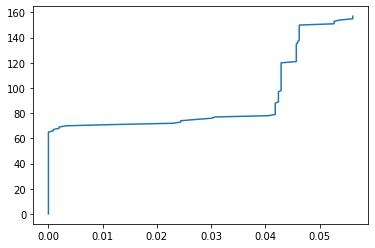

In [63]:
plt.plot(x, range(0, x.shape[0]))

In [64]:
from kneed import KneeLocator

In [65]:
kneedle = KneeLocator(x, range(0, x.shape[0]))

In [67]:
eps = kneedle.knee

In [71]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=eps, min_samples=1).fit(points)

In [74]:
clustering.labels_

array([ 0,  0,  0, ..., 48, 50, 50])